Objectives

* Understand Trends: To identify patterns and factors that can cause depression in stufents
* Analyze Factor: Evaluate the influence of certain factors such as academic and work pressure, sleep duration, dietary habits, thoughts of suicide and family history of mentall illness
* Predictive Modeling: Build a machine learning model to predict the chance of depression among students based on the given categories
* Solutions: To provide useful insights and solutions that may help educators or students to supoort student

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
#print(f"Matplotlib version: {matplolib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Numpy version: 1.26.4
Pandas version: 2.2.2
Seaborn version: 0.13.2


In [47]:
df = pd.read_csv('sdd.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## Data Analysis

In [48]:
df.shape

(27901, 18)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [50]:
df.dtypes

,0
id,int64
Gender,object
Age,float64
City,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64


In [51]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [52]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [53]:
df.nunique()

,0
id,27901
Gender,2
Age,34
City,52
Profession,14
Academic Pressure,6
Work Pressure,3
CGPA,332
Study Satisfaction,6
Job Satisfaction,5


In [54]:
df.duplicated().sum()

0

**Analyzing City**

In [55]:
unique_city = df['City'].unique()
unique_city

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [56]:
df['City'].value_counts()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


In [57]:
# Filter city names where count is greater than 100
x = df['City'].value_counts()
cities = x[x > 100].index.tolist()

# Print the city names
print(cities)
len(cities)

['Kalyan', 'Srinagar', 'Hyderabad', 'Vasai-Virar', 'Lucknow', 'Thane', 'Ludhiana', 'Agra', 'Surat', 'Kolkata', 'Jaipur', 'Patna', 'Visakhapatnam', 'Pune', 'Ahmedabad', 'Bhopal', 'Chennai', 'Meerut', 'Rajkot', 'Delhi', 'Bangalore', 'Ghaziabad', 'Mumbai', 'Vadodara', 'Varanasi', 'Nagpur', 'Indore', 'Kanpur', 'Nashik', 'Faridabad']


30

**Analyzing Profession**

In [58]:
df['Profession'].nunique()

14

In [59]:
df['Profession'].unique()

array(['Student', 'Civil Engineer', 'Architect', 'UX/UI Designer',
       'Digital Marketer', 'Content Writer', 'Educational Consultant',
       'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur',
       'Pharmacist'], dtype=object)

**Analyzing Sleep Duration**

In [60]:
df['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [61]:
sleep = df['Sleep Duration'].value_counts()

**Analyzing Dietary Habits**

In [62]:
df['Dietary Habits'].nunique()

4

In [63]:
df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

## EDA

In [64]:
# Get the list of cities with more than 100 cases
x = df['City'].value_counts()
cities = x[x > 100].index.tolist()

# Filter the dataframe to include only rows for these cities
data = df[df['City'].isin(cities)]

data.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [65]:
data.shape

(27875, 18)

**Dropping Certain Columns:**

In [66]:
df = df.drop("id", axis=1)
df = df.drop("City", axis=1)
df = df.drop("Profession", axis=1)
df = df.drop("Degree", axis=1)

In [67]:
#Mapping Gender
df["Gender"] = df["Gender"].str.replace("Female", "1", regex=False)
df["Gender"] = df["Gender"].str.replace("Male", "0", regex=False).astype(int)

In [68]:
#mapping Sleep Duration
df["Sleep Duration"] = df["Sleep Duration"].str.replace("Less than 5 hours", "0", regex=False)
df["Sleep Duration"] = df["Sleep Duration"].str.replace("5-6 hours", "1", regex=False)
df["Sleep Duration"] = df["Sleep Duration"].str.replace("7-8 hours", "2", regex=False)
df["Sleep Duration"] = df["Sleep Duration"].str.replace("More than 8 hours", "3", regex=False)
df["Sleep Duration"] = df["Sleep Duration"].str.replace("Others", "4", regex=False).astype(int)

In [69]:
#Mapping Dietary Habits
df["Dietary Habits"] = df["Dietary Habits"].str.replace("Unhealthy", "0", regex=False)
df["Dietary Habits"] = df["Dietary Habits"].str.replace("Moderate", "1", regex=False)
df["Dietary Habits"] = df["Dietary Habits"].str.replace("Healthy", "2", regex=False)
df["Dietary Habits"] = df["Dietary Habits"].str.replace("Others", "3", regex=False).astype(int)

In [70]:
#Mapping Suicidal thoughts
df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].str.replace("No", "0", regex=False)
df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].str.replace("Yes", "1", regex=False).astype(int)

In [71]:
#Mapping Family History
df["Family History of Mental Illness"] = df["Family History of Mental Illness"].str.replace("No", "0", regex=False)
df["Family History of Mental Illness"] = df["Family History of Mental Illness"].str.replace("Yes", "1", regex=False).astype(int)

In [72]:
# Remove extra white space found in the dataframe columns to avoid errors
df.columns = df.columns.str.strip()

In [73]:
#Checking null values
df.isnull().sum()

,0
Gender,0
Age,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0


In [74]:
#Substituting null value with  mean values
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mean())

### Re Analyzing dataset:
* To avoid any inconsistency

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   Academic Pressure                      27901 non-null  float64
 3   Work Pressure                          27901 non-null  float64
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  float64
 6   Job Satisfaction                       27901 non-null  float64
 7   Sleep Duration                         27901 non-null  int64  
 8   Dietary Habits                         27901 non-null  int64  
 9   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 10  Work/Study Hours                       27901 non-null  float64
 11  Fi

In [76]:
df.shape

(27901, 14)

In [77]:
df.describe()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,0.442780,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,1.400631,0.905308,0.632809,7.156984,3.139867,0.483961,0.585499
std,0.496724,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,1.128258,0.797977,0.482048,3.707642,1.437269,0.499752,0.492645
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,0.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,1.000000,1.000000,1.000000,8.000000,3.000000,0.000000,1.000000
75%,1.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,2.000000,2.000000,1.000000,10.000000,4.000000,1.000000,1.000000
max,1.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,4.000000,3.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [78]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

<Axes: >

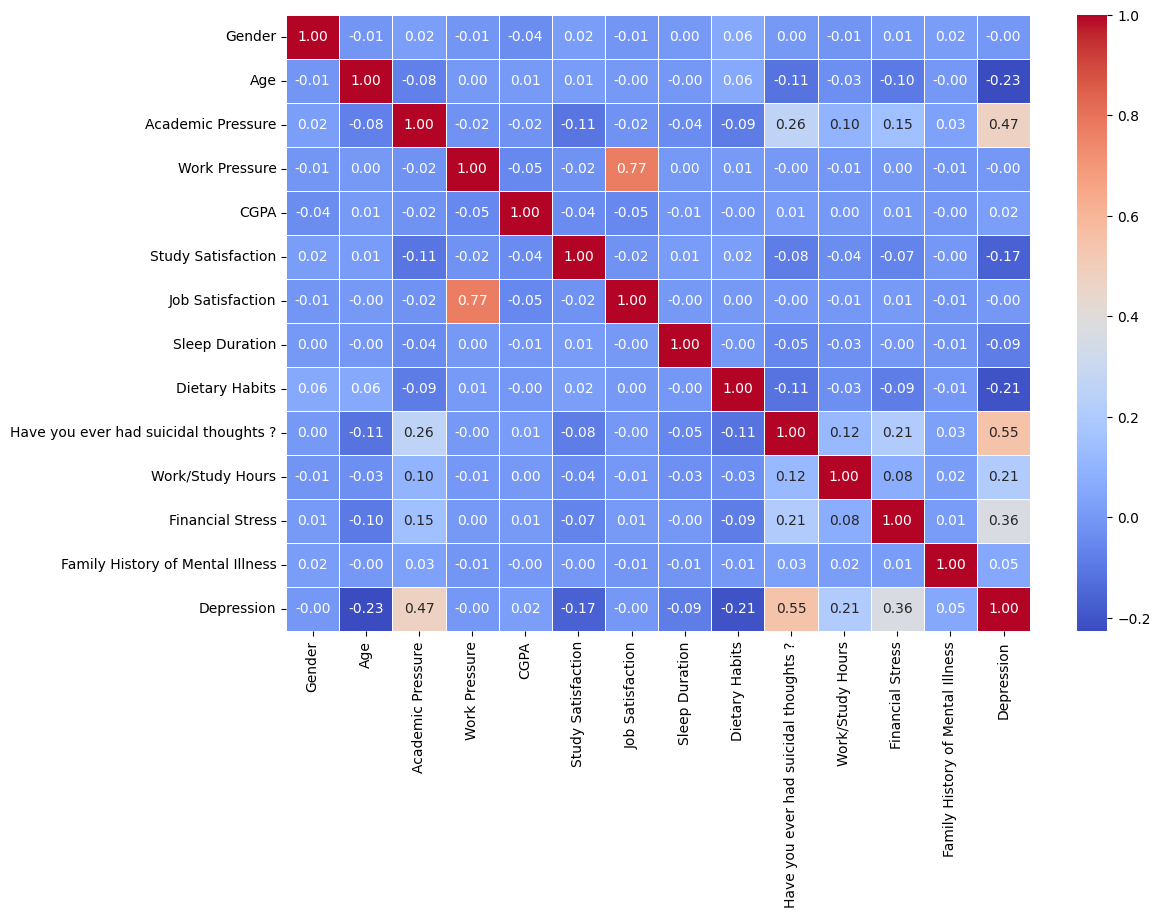

In [79]:
corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


* Exploring data spread.

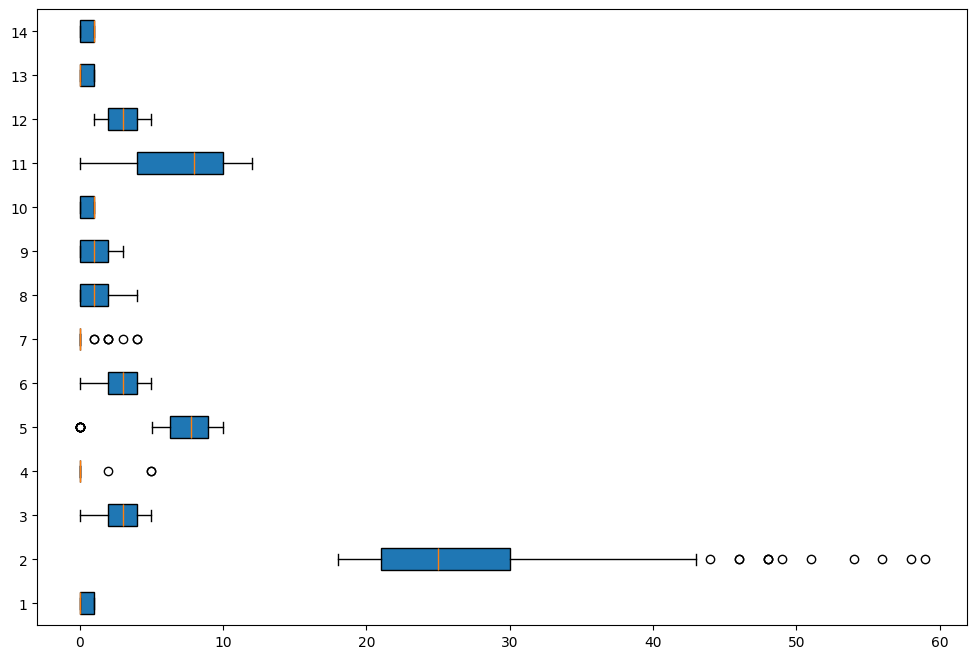

In [80]:
plt.figure(figsize=(12, 8))
plt.boxplot(df,vert = False, patch_artist = True) #vert to show alignment, patch_artist for color
plt.show()

* It has plotted plot for each column individually
* We can see that col2 = age is slightly right skewed, along with no of outliers.


In [81]:
# Assuming 'Age' is the column in your dataframe
age_data = df['Age']

# Calculate Q1 and Q3
Q1 = age_data.quantile(0.25)
Q3 = age_data.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate inner bounds (1.5 * IQR)
inner_lower_bound = Q1 - 1.5 * IQR
inner_upper_bound = Q3 + 1.5 * IQR

# Calculate outer bounds (3 * IQR)
outer_lower_bound = Q1 - 3 * IQR
outer_upper_bound = Q3 + 3 * IQR

# Display bounds
print("Inner Bounds:", inner_lower_bound, "to", inner_upper_bound)
print("Outer Bounds:", outer_lower_bound, "to", outer_upper_bound)

# Identify outliers
mild_outliers = age_data[(age_data < inner_lower_bound) | (age_data > inner_upper_bound)]
extreme_outliers = age_data[(age_data < outer_lower_bound) | (age_data > outer_upper_bound)]

print("Mild Outliers:")
print(mild_outliers)
print('Count :')
print(mild_outliers.count())
print("Extreme Outliers:")
print(extreme_outliers)
print('Count :')
print(extreme_outliers.count())


Inner Bounds: 7.5 to 43.5
Outer Bounds: -6.0 to 57.0
Mild Outliers:
2909     58.0
3436     49.0
4386     51.0
5537     44.0
9006     46.0
9238     59.0
13499    54.0
13618    48.0
14819    56.0
18766    46.0
25202    48.0
27334    48.0
Name: Age, dtype: float64
Count :
12
Extreme Outliers:
2909    58.0
9238    59.0
Name: Age, dtype: float64
Count :
2


<ipython-input-82-8b2574da0ae1>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([depressed_data['Age'], non_depressed_data['Age']],


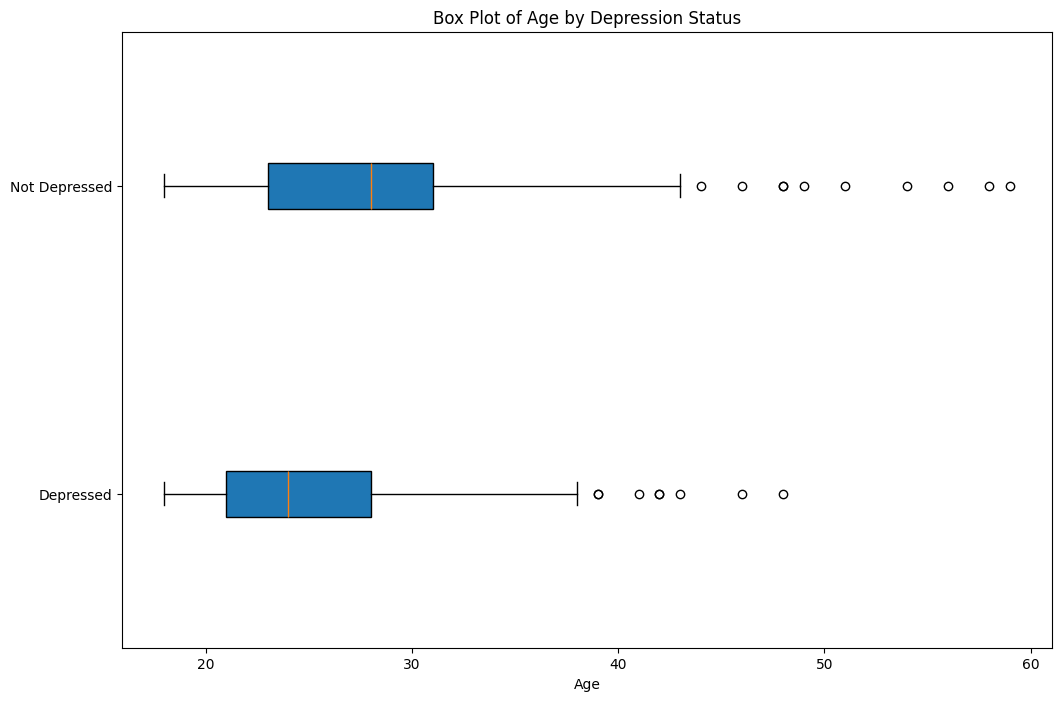

In [82]:
# Separate data for depressed and non-depressed individuals
depressed_data = df[df['Depression'] == 1]
non_depressed_data = df[df['Depression'] == 0]

plt.figure(figsize=(12, 8))

# Create box plots for each group
plt.boxplot([depressed_data['Age'], non_depressed_data['Age']],
            vert=False, patch_artist=True, labels=['Depressed', 'Not Depressed'])

plt.xlabel('Age')
plt.title('Box Plot of Age by Depression Status')
plt.show()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   Academic Pressure                      27901 non-null  float64
 3   Work Pressure                          27901 non-null  float64
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  float64
 6   Job Satisfaction                       27901 non-null  float64
 7   Sleep Duration                         27901 non-null  int64  
 8   Dietary Habits                         27901 non-null  int64  
 9   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 10  Work/Study Hours                       27901 non-null  float64
 11  Fi

<Axes: xlabel='Depression', ylabel='count'>

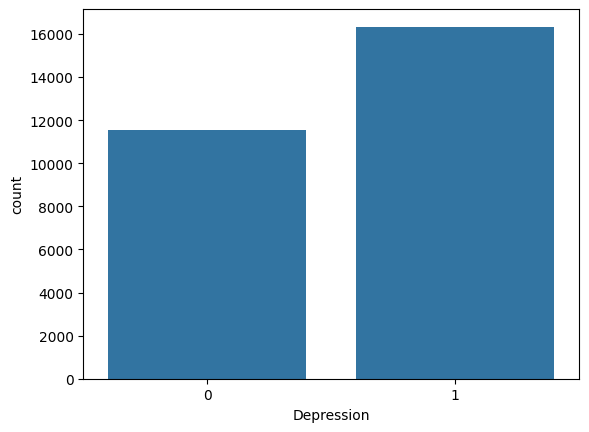

In [84]:
sns.countplot(x = df['Depression'], data = df) # to determine the count of values

In [85]:
df.shape

(27901, 14)

* From the countplot we can determine that out of around 28,000 records around 16,000 student got depression while 11000 student approx weren't.

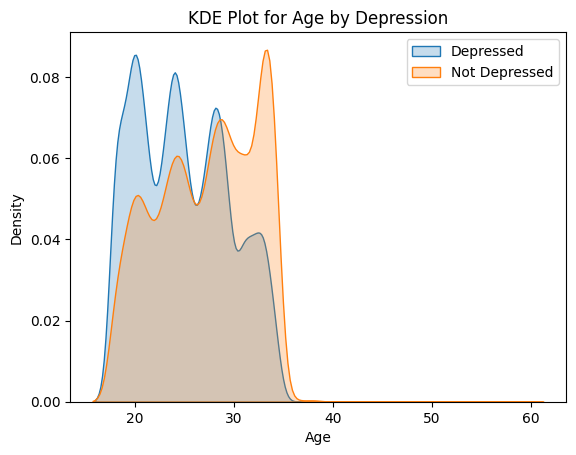

In [86]:
#to plot the distribution of data
sns.kdeplot(data=df[df['Depression'] == 1], x='Age', label='Depressed', fill=True)
sns.kdeplot(data=df[df['Depression'] == 0], x='Age', label='Not Depressed', fill=True)
plt.title('KDE Plot for Age by Depression')
plt.legend()
plt.show()

* We got outliers in our age col, most of our data span from age around 8 to 40.
* From the plot it could be inferred that the students of the age group 20 to 30 have high ratios of being depressed and then tj=his trend lowers down with the increasing age.

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Depression')

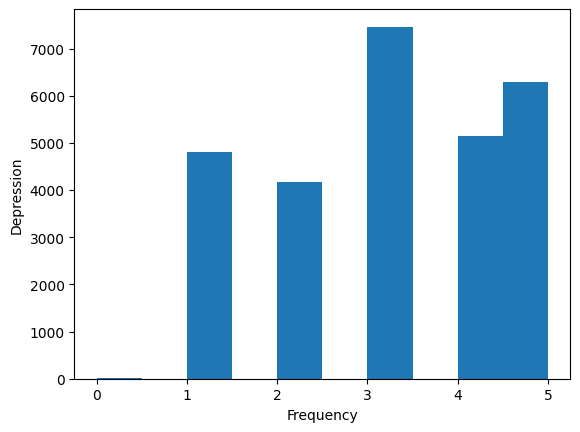

In [88]:
# import matplotlib.pyplot as plt  # Import pyplot
# for i in df[:-1]:

plt.hist(df['Academic Pressure'],bins = 10)
plt.xlabel('Frequency')
plt.ylabel('Depression')

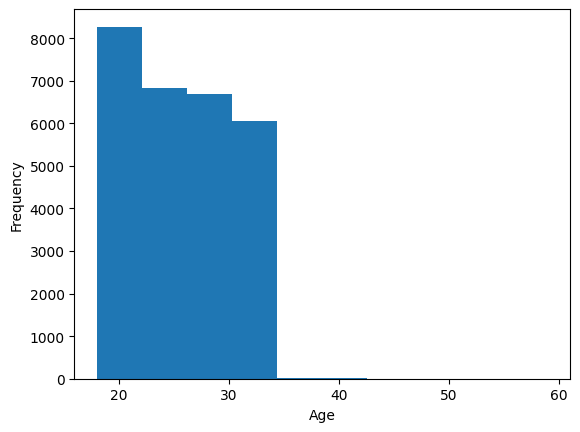

In [89]:
plt.hist(df['Age'], bins=10)  # Assuming 'Age' is the data you want to plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

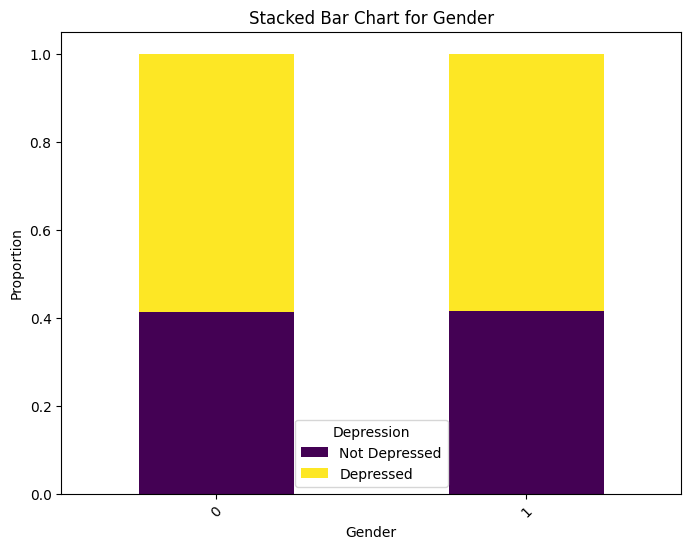

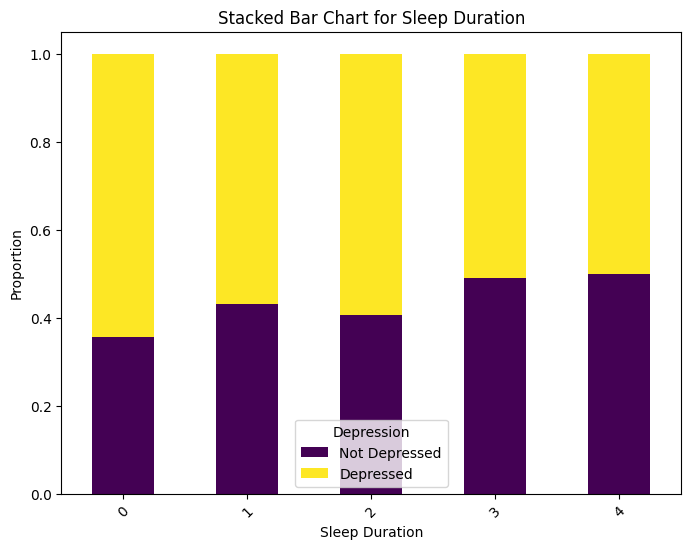

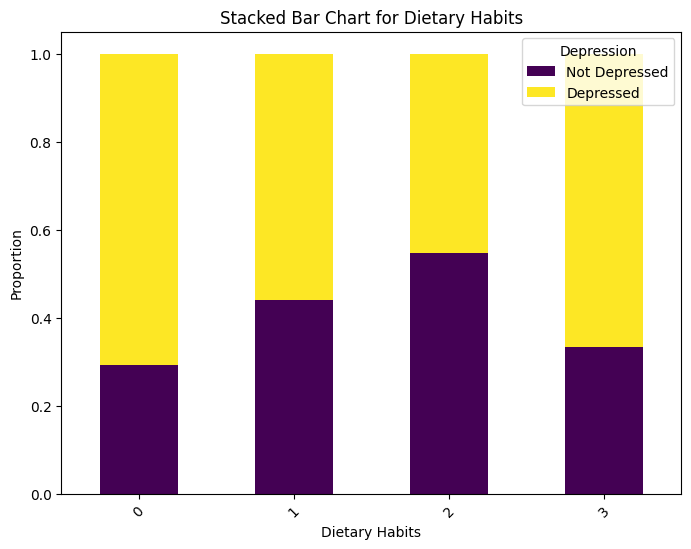

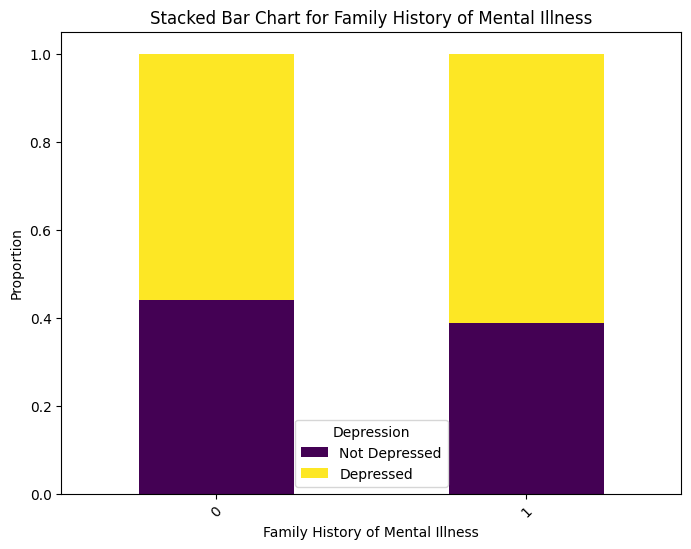

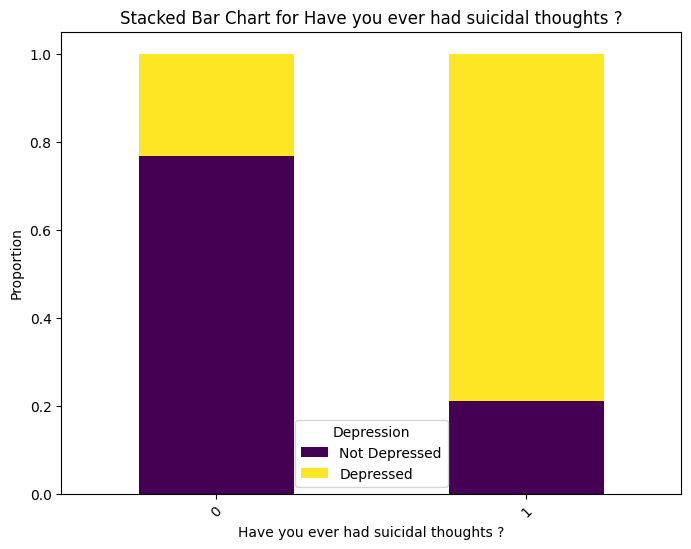

In [91]:
categorical_columns = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']

for column in categorical_columns:
    crosstab = pd.crosstab(df[column], df['Depression'], normalize='index')  # Proportions
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

    plt.title(f"Stacked Bar Chart for {column}")
    plt.ylabel("Proportion")
    plt.xlabel(column)
    plt.legend(title="Depression", labels=["Not Depressed", "Depressed"])
    plt.xticks(rotation=45)
    plt.show()

## Preparing dataset for model

In [92]:
#Preparing dataset
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [93]:
x.head(2)

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,33.0,5.0,0.0,8.97,2.0,0.0,1,2,1,3.0,1.0,0
1,1,24.0,2.0,0.0,5.90,5.0,0.0,1,1,0,3.0,2.0,1


In [94]:
y.head(2)

,Depression
0,1
1,0


### **Train Test Split**

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

In [96]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25110, 13), (2791, 13), (25110,), (2791,))

### **Scaling Vaues**

In [97]:
from sklearn.preprocessing import StandardScaler


In [101]:
scaler = StandardScaler()

In [102]:
#scaling x_train
x_train = scaler.fit_transform(x_train)

In [103]:
x_train

array([[-0.89176142, -1.39398861, -0.8245775 , ..., -0.03943001,
         0.59707936, -0.96824584],
       [-0.89176142, -1.39398861,  0.62419562, ..., -0.30847555,
         0.59707936, -0.96824584],
       [-0.89176142, -0.98554919,  1.34858218, ...,  0.49866106,
         1.29316343,  1.03279556],
       ...,
       [-0.89176142,  0.64820849,  0.62419562, ..., -0.84656662,
         1.29316343,  1.03279556],
       [ 1.12137616, -0.16867035,  1.34858218, ..., -0.03943001,
         1.29316343,  1.03279556],
       [-0.89176142,  0.8524282 , -0.10019094, ...,  0.49866106,
        -1.49117285,  1.03279556]])

In [104]:
x_test = scaler.transform(x_test)

## TRAINING MODEL:

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
#Creating a logistic regressio object, that can access the function of class logistic regression.
clf = LogisticRegression()

In [107]:
#Model training.
clf.fit(x_train, y_train)

LogisticRegression()

### **Model Evaluation**

In [108]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
accuracy_score(y_test, y_pred)

0.8527409530634181

* Pickling Model:

In [116]:
import pickle

In [117]:
pickle.dump(clf, open('model.pkl', 'wb'))